<a href="https://colab.research.google.com/github/Bgv-Ilyas/Lab1/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%961.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 1
## Исследование набора данных центра обслуживания по переливанию крови
Ссылка на источник: https://archive.ics.uci.edu/dataset/176/blood+transfusion+service+center

Выполнил студент 2-го курса ПИЖ-б-о-22-1: Плуугатырев В.А.

### Подключение библиотеки NumPy и загрузка данных

In [ ]:
!wget https://raw.githubusercontent.com/BigLofanbl4/AI1/main/transfusion.data

--2024-04-07 15:00:00--  https://raw.githubusercontent.com/BigLofanbl4/AI1/main/transfusion.data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11230 (11K) [text/plain]
Saving to: ‘transfusion.data’

transfusion.data    100%[===================>]  10.97K  --.-KB/s    in 0s      

2024-04-07 15:00:00 (65.2 MB/s) - ‘transfusion.data’ saved [11230/11230]



In [ ]:
import numpy as np
data_path = "transfusion.data"
data = np.genfromtxt(data_path, delimiter=",", skip_header=1)
print(data)

[[0.00e+00 1.30e+01 3.25e+03 2.80e+01 1.00e+00]
 [1.00e+00 1.60e+01 4.00e+03 3.50e+01 1.00e+00]
 [2.00e+00 2.00e+01 5.00e+03 4.50e+01 1.00e+00]
 ...
 [2.30e+01 3.00e+00 7.50e+02 6.20e+01 0.00e+00]
 [3.90e+01 1.00e+00 2.50e+02 3.90e+01 0.00e+00]
 [7.20e+01 1.00e+00 2.50e+02 7.20e+01 0.00e+00]]


### Тип переменной и форма (shape)

In [ ]:
print ( "Data type : ", type(data) )
print ( "Data shape : ", data.shape )
print ( data[-4:] )

Data type :  <class 'numpy.ndarray'>
Data shape :  (747, 5)
[[ 21.   2. 500.  52.   0.]
 [ 23.   3. 750.  62.   0.]
 [ 39.   1. 250.  39.   0.]
 [ 72.   1. 250.  72.   0.]]


### Получение типа набора данных, строки, элемента

In [ ]:
data1 = np.genfromtxt(data_path, delimiter=",", dtype=None, skip_header=1)
print('Shape of the dataset:', data1.shape)
print('Dataset type:', type(data1))
print('A single row of the dataset is type of:', type(data1[0]))
print('Types of elements:', type(data1[0][1]), type(data1[0][4]))
print('Dataset:')
print(data1)

Shape of the dataset: (747, 5)
Dataset type: <class 'numpy.ndarray'>
A single row of the dataset is type of: <class 'numpy.ndarray'>
Types of elements: <class 'numpy.int64'> <class 'numpy.int64'>
Dataset:
[[   0   13 3250   28    1]
 [   1   16 4000   35    1]
 [   2   20 5000   45    1]
 ...
 [  23    3  750   62    0]
 [  39    1  250   39    0]
 [  72    1  250   72    0]]


### Указание типа столбцов при загрузке данных

In [ ]:
dt = np.dtype("f8, f8, f8, f8, f8")
data2 = np.genfromtxt(data_path, delimiter=",", dtype=dt, skip_header=1)
print('Shape of the dataset:', data2.shape)
print('Dataset type:', type(data2))
print('A single row of the dataset is type of:', type(data2[0]))
print('Types of elements:', type(data2[0][1]), type(data2[0][4]))
print('Dataset slice:')
print(data2[:10])

Shape of the dataset: (747,)
Dataset type: <class 'numpy.ndarray'>
A single row of the dataset is type of: <class 'numpy.void'>
Types of elements: <class 'numpy.float64'> <class 'numpy.float64'>
Dataset slice:
[(0., 13.,  3250., 28., 1.) (1., 16.,  4000., 35., 1.)
 (2., 20.,  5000., 45., 1.) (1., 24.,  6000., 77., 0.)
 (4.,  4.,  1000.,  4., 0.) (2.,  7.,  1750., 14., 1.)
 (1., 12.,  3000., 35., 0.) (2.,  9.,  2250., 22., 1.)
 (5., 46., 11500., 98., 1.) (4., 23.,  5750., 58., 0.)]


### Сортировка данных
Набор данных имеет два класса, которые характеризуются двоичной переменной, представляющей, сдавал ли студент кровь в марте 2007 года (1 означает сдачу крови; 0 означает отказ от сдачи крови). В наборе данных 570 студентов отказались сдавать кровь, а 170 согласились.

In [ ]:
# Получаем индексы, которые бы отсортировали массив data2 по последнему элементу каждого кортежа
sorted_indices = np.argsort(data2, order='f4')  # f4 указывает на поле с индексом 4 (последнее значение в кортеже)

# Используем эти индексы для сортировки исходного массива
sorted_data2 = data2[sorted_indices]

print(sorted_data2[:10])

[(0.,  2.,  500.,  4., 0.) (0.,  3.,  750.,  4., 0.)
 (0.,  8., 2000., 59., 0.) (1.,  7., 1750., 57., 0.)
 (1.,  9., 2250., 51., 0.) (1., 12., 3000., 35., 0.)
 (1., 13., 3250., 47., 0.) (1., 14., 3500., 58., 0.)
 (1., 14., 3500., 95., 0.) (1., 24., 6000., 77., 0.)]


### Построение графиков с использованием Matplotlib

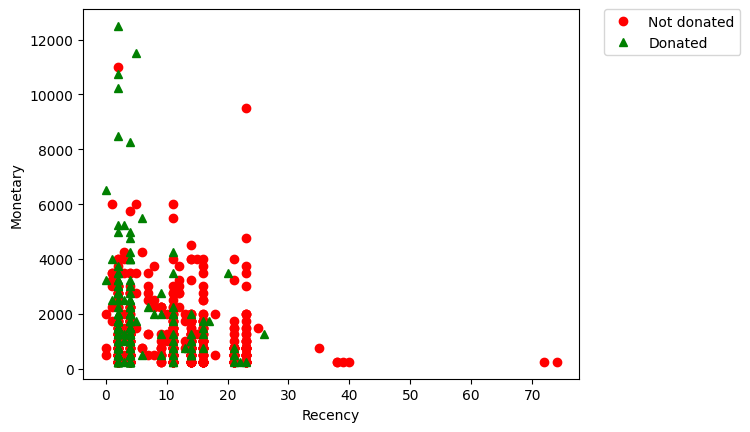

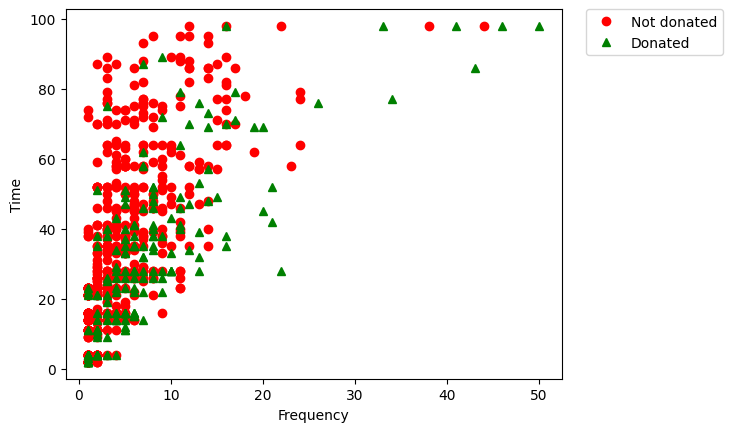

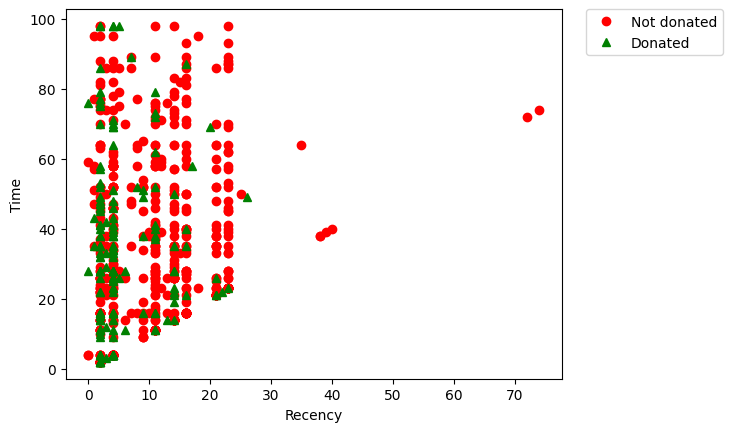

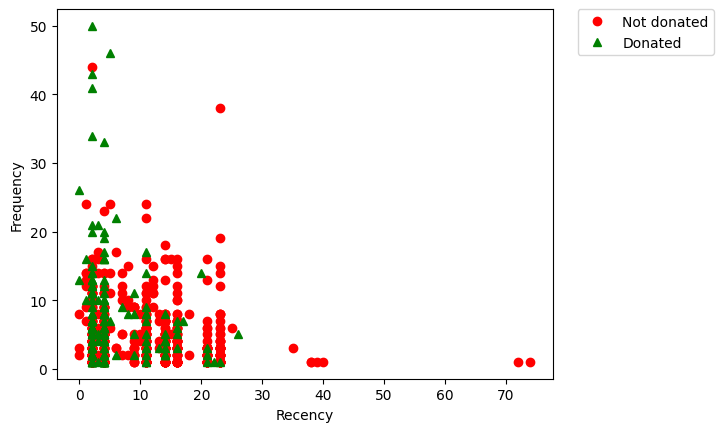

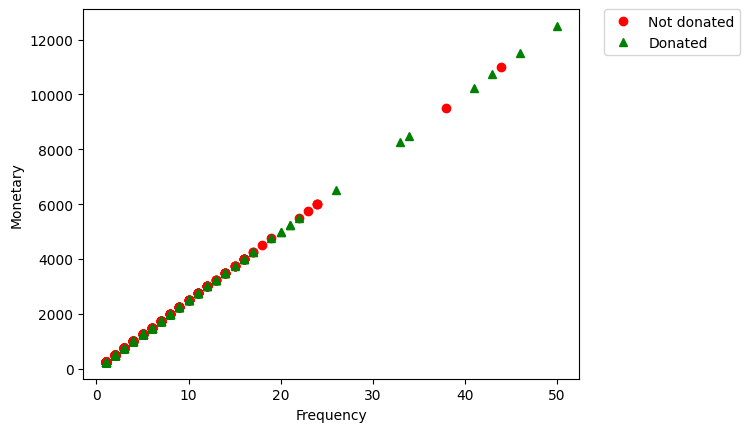

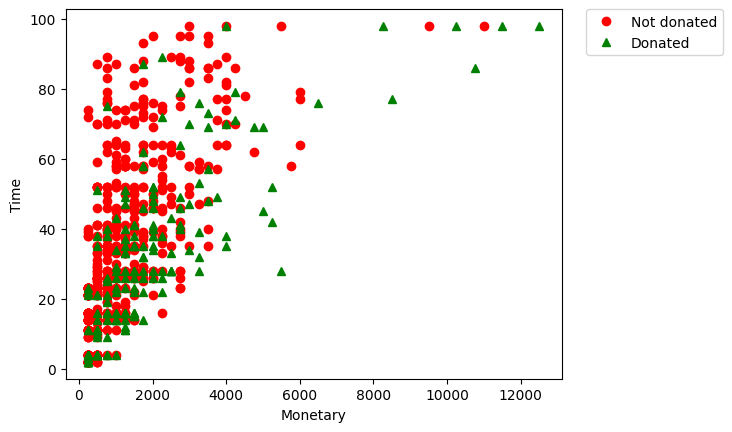

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Данные из отдельных столбцов
recency = [] # Сколько месяцев с последней сдачи крови
frequency = [] # Сколько раз сдавал кровь
monetary = [] # Сколько всего сдал крови
time = [] # Месяцев с первой сдачи крови

# Выполняем обход всей коллекции sorted_data2
for dot in sorted_data2:
    recency.append(dot[0])
    frequency.append(dot[1])
    monetary.append(dot[2])
    time.append(dot[3])

# Строим графики по проекциям данных
# Учитываем, что первые 570 студентов не сдавали кровь
plt.figure(1)
don, = plt.plot(recency[:570], monetary[:570], 'ro', label='Not donated')
ndon, = plt.plot(recency[570:748], monetary[570:748], 'g^', label='Donated')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Recency')
plt.ylabel('Monetary')

plt.figure(2)
don, = plt.plot(frequency[:570], time[:570], 'ro', label='Not donated')
ndon, = plt.plot(frequency[570:748], time[570:748], 'g^', label='Donated')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Frequency')
plt.ylabel('Time')

plt.figure(3)
don, = plt.plot(recency[:570], time[:570], 'ro', label='Not donated')
ndon, = plt.plot(recency[570:748], time[570:748], 'g^', label='Donated')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Recency')
plt.ylabel('Time')

plt.figure(4)
don, = plt.plot(recency[:570], frequency[:570], 'ro', label='Not donated')
ndon, = plt.plot(recency[570:748], frequency[570:748], 'g^', label='Donated')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Recency')
plt.ylabel('Frequency')

plt.figure(5)
don, = plt.plot(frequency[:570], monetary[:570], 'ro', label='Not donated')
ndon, = plt.plot(frequency[570:748], monetary[570:748], 'g^', label='Donated')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Frequency')
plt.ylabel('Monetary')

plt.figure(6)
don, = plt.plot(monetary[:570], time[:570], 'ro', label='Not donated')
ndon, = plt.plot(monetary[570:748], time[570:748], 'g^', label='Donated')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Monetary')
plt.ylabel('Time')

plt.show()

